In [1]:
#For this lab we will build a model on customer churn binary classification problem. 
#You are working as an analyst with this internet service provider. 
# You are provided with this historical data about your company's customers and their churn trends. 
#Your task is to build a machine learning model that will help the company identify customers 
# that are more likely to default/churn and thus prevent losses from such customers.
# we will namely take a look at the degree of imbalance in the data and correct it

## Round 1

In [3]:
import pandas as pd

In [29]:
churnData= pd.read_csv("DATA_Customer-Churn.txt")

In [33]:
churnData.shape

(7043, 16)

In [36]:
churnData.dtypes.to_dict()
# {'gender': dtype('O'),'SeniorCitizen': dtype('int64'), 'Partner': dtype('O'),
#'Dependents': dtype('O'), 'tenure': dtype('int64'), 'PhoneService': dtype('O'),
#'OnlineSecurity': dtype('O'), 'OnlineBackup': dtype('O'), 'DeviceProtection': dtype('O'),
#'TechSupport': dtype('O'),'StreamingTV': dtype('O'), 'StreamingMovies': dtype('O'),
#'Contract': dtype('O'), 'MonthlyCharges': dtype('float64'),'TotalCharges': dtype('O'),
#'Churn': dtype('O')}
churnData['TotalCharges']= pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [37]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [40]:
churnData.dropna(axis=0, inplace=True)
# axis 0 = rows

In [41]:
churnData.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [57]:
churnData['churned']= churnData['Churn']=='Yes'
churnData['churned']

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: churned, Length: 7032, dtype: bool

In [58]:
X=churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y=churnData['churned']

In [45]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler=MinMaxScaler()

In [62]:
X_train_mms= scaler.fit_transform(X_train)
X_test_mms= scaler.transform(X_test)
# should we fit on the test dataset ? 

In [52]:
## optional for later : encode categorical variables 

## Round2

### Logistic regression

In [63]:
from sklearn.metrics import (confusion_matrix,
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score)

In [68]:
from sklearn.linear_model import LogisticRegression
Logreg1=LogisticRegression()
Logreg1.fit(X_train_mms, y_train)


LogisticRegression()

In [77]:
y_pred_Logreg1_train = Logreg1.predict(X_train_mms)
Logreg1_train_scores= [accuracy_score(y_train, y_pred_Logreg1_train), precision_score(y_train, y_pred_Logreg1_train), recall_score(y_train, y_pred_Logreg1_train), roc_auc_score(y_train, y_pred_Logreg1_train)]
cmLogreg1_train= confusion_matrix(y_train, y_pred_Logreg1_train).tolist()
cmLogreg1_train=[el for i in cmLogreg1_train for el in i]
print("Confusion matrix train :", cmLogreg1_train)

y_pred_Logreg1 = Logreg1.predict(X_test_mms)
Logreg1_scores= [accuracy_score(y_test, y_pred_Logreg1), precision_score(y_test, y_pred_Logreg1), recall_score(y_test, y_pred_Logreg1), roc_auc_score(y_test, y_pred_Logreg1)]
cmLogreg1= confusion_matrix(y_test, y_pred_Logreg1).tolist()
cmLogreg1=[el for i in cmLogreg1 for el in i]
print("Confusion matrix test :", cmLogreg1)

scores_logreg1= (pd.DataFrame(list(zip(Logreg1_train_scores + Logreg1_scores)),
               columns = ["LogisticRegression"], 
               index =['Accuracy_Train', 'Precision_train', 'Recall_Train', 'RocAuc_Train','Accuracy_Test', 'Precision_Test', 'Recall_Test', 'RocAuc_Test' ]))
scores_logreg1

Confusion matrix train : [3774, 356, 804, 691]
Confusion matrix test : [936, 97, 212, 162]


,LogisticRegression
Accuracy_Train,0.793778
Precision_train,0.659981
Recall_Train,0.462207
RocAuc_Train,0.688004
Accuracy_Test,0.780384
Precision_Test,0.625483
Recall_Test,0.433155
RocAuc_Test,0.669627


### KNeighbors Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier
KNclass= KNeighborsClassifier()
KNclass.fit(X_train_mms, y_train)

KNeighborsClassifier()

In [78]:
y_pred_KNclass_train = KNclass.predict(X_train_mms)
KNclass_train_scores= [accuracy_score(y_train, y_pred_KNclass_train), precision_score(y_train, y_pred_KNclass_train), recall_score(y_train, y_pred_KNclass_train), roc_auc_score(y_train, y_pred_KNclass_train)]
cmKNclass_train= confusion_matrix(y_train, y_pred_KNclass_train).tolist()
cmKNclass_train=[el for i in cmKNclass_train for el in i]
print("Confusion matrix train :", cmKNclass_train)

y_pred_KNclass = KNclass.predict(X_test_mms)
KNclass_scores= [accuracy_score(y_test, y_pred_KNclass), precision_score(y_test, y_pred_KNclass), recall_score(y_test, y_pred_KNclass), roc_auc_score(y_test, y_pred_KNclass)]
cmKNclass= confusion_matrix(y_test, y_pred_KNclass).tolist()
cmKNclass=[el for i in cmKNclass for el in i]
print("Confusion matrix test :", cmKNclass)

scores_KNclass= (pd.DataFrame(list(zip(KNclass_train_scores + KNclass_scores)),
               columns = ["KNeighborsClassifier"], 
               index =['Accuracy_Train', 'Precision_train', 'Recall_Train', 'RocAuc_Train','Accuracy_Test', 'Precision_Test', 'Recall_Test', 'RocAuc_Test' ]))
scores_KNclass

Confusion matrix train : [3783, 347, 586, 909]
Confusion matrix test : [907, 126, 207, 167]


,KNeighborsClassifier
Accuracy_Train,0.834133
Precision_train,0.723726
Recall_Train,0.608027
RocAuc_Train,0.762004
Accuracy_Test,0.763326
Precision_Test,0.569966
Recall_Test,0.446524
RocAuc_Test,0.662275


### Decision tree classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
DTClass=DecisionTreeClassifier()
DTClass.fit(X_train_mms, y_train)

DecisionTreeClassifier()

In [79]:
y_pred_DTClass_train = DTClass.predict(X_train_mms)
DTClass_train_scores= [accuracy_score(y_train, y_pred_DTClass_train), precision_score(y_train, y_pred_DTClass_train), recall_score(y_train, y_pred_DTClass_train), roc_auc_score(y_train, y_pred_DTClass_train)]
cmDTClass_train= confusion_matrix(y_train, y_pred_DTClass_train).tolist()
cmDTClass_train=[el for i in cmDTClass_train for el in i]
print("Confusion matrix train :", cmDTClass_train)

y_pred_DTClass = DTClass.predict(X_test_mms)
DTClass_scores= [accuracy_score(y_test, y_pred_DTClass), precision_score(y_test, y_pred_DTClass), recall_score(y_test, y_pred_DTClass), roc_auc_score(y_test, y_pred_DTClass)]
cmDTClass= confusion_matrix(y_test, y_pred_DTClass).tolist()
cmDTClass=[el for i in cmDTClass for el in i]
print("Confusion matrix test :", cmDTClass)

scores_DTClass= (pd.DataFrame(list(zip(DTClass_train_scores + DTClass_scores)),
               columns = ["DecisionTreeClassifier"], 
               index =['Accuracy_Train', 'Precision_train', 'Recall_Train', 'RocAuc_Train','Accuracy_Test', 'Precision_Test', 'Recall_Test', 'RocAuc_Test' ]))
scores_DTClass

Confusion matrix train : [4120, 10, 45, 1450]
Confusion matrix test : [836, 197, 188, 186]


,DecisionTreeClassifier
Accuracy_Train,0.990222
Precision_train,0.993151
Recall_Train,0.969900
RocAuc_Train,0.983739
Accuracy_Test,0.726368
Precision_Test,0.485640
Recall_Test,0.497326
RocAuc_Test,0.653310


In [107]:
results= round(scores_logreg1,2).join([round(scores_KNclass,2), round(scores_DTClass,2)])
results

,LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier
Accuracy_Train,0.79,0.83,0.99
Precision_train,0.66,0.72,0.99
Recall_Train,0.46,0.61,0.97
RocAuc_Train,0.69,0.76,0.98
Accuracy_Test,0.78,0.76,0.73
Precision_Test,0.63,0.57,0.49
Recall_Test,0.43,0.45,0.50
RocAuc_Test,0.67,0.66,0.65


In [ ]:
# seems the decision tree is overfitting ? 
# we should really optimize parameters and set random states before judging

## Round 3 KFold Cross validation 

In [88]:
import numpy as np
from sklearn.model_selection import KFold

In [90]:
### K-fold Cross-Validation with Python uses Sklearn.cross_val_score)
from sklearn.model_selection import cross_val_score

In [95]:
scores_lr = cross_val_score(Logreg1, X=X_train_mms, y=y_train, cv=10)
print('Cross Validation accuracy scores for logistic regression: %s' % scores_lr)
print('Cross Validation accuracy for logistic regression: %.3f +/- %.3f  \n' % (np.mean(scores_lr),np.std(scores_lr)))
scores_knn = cross_val_score(KNclass, X=X_train_mms, y=y_train, cv=10)
print('Cross Validation accuracy scores for KNeighborsClass: %s' % scores_knn)
print('Cross Validation accuracy for KNeighborsClass: %.3f +/- %.3f \n' % (np.mean(scores_knn),np.std(scores_knn)))
scores_DTC = cross_val_score(DTClass, X=X_train_mms, y=y_train, cv=10)
print('Cross Validation accuracy scores for Decision Tree: %s' % scores_DTC)
print('Cross Validation accuracy for Decision Tree: %.3f +/- %.3f' % (np.mean(scores_DTC),np.std(scores_DTC)))


Cross Validation accuracy scores for logistic regression: [0.77975133 0.79751332 0.78863233 0.78685613 0.76731794 0.80960854
 0.78647687 0.79003559 0.80427046 0.80604982]
Cross Validation accuracy for logistic regression: 0.792 +/- 0.012  

Cross Validation accuracy scores for KNeighborsClass: [0.75310835 0.76554174 0.74777975 0.77442274 0.75310835 0.78291815
 0.79003559 0.78825623 0.80071174 0.78647687]
Cross Validation accuracy for KNeighborsClass: 0.774 +/- 0.017 

Cross Validation accuracy scores for Decision Tree: [0.69449378 0.72113677 0.75488455 0.73534636 0.69804618 0.71886121
 0.71174377 0.72953737 0.71352313 0.73309609]
Cross Validation accuracy for Decision Tree: 0.721 +/- 0.017


## Round 4 Random Forest & Gridsearch

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
model = RandomForestClassifier(random_state=98)
model.fit(X_train_mms, y_train)

RandomForestClassifier(random_state=98)

In [101]:
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=98), 
                              {'n_estimators': [10, 100, 500, 1000, 1500], 'criterion': ['gini', 'entropy', 'log_loss']}, 
                              cv=3, scoring='roc_auc'
)
grid_search_cv.fit(X_train_mms, y_train)
grid_search_cv.best_score_

0.7851064378295751

In [102]:
grid_search_cv.best_params_

{'criterion': 'entropy', 'n_estimators': 500}

In [103]:
RFC = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=98)
RFC.fit(X_train_mms, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=98)

In [105]:
scores_RFC = cross_val_score(RFC, X=X_train_mms, y=y_train, cv=10)
print('Cross Validation accuracy scores for Random Forest: %s' % scores_RFC)
print('Cross Validation accuracy for Random Forest: %.3f +/- %.3f' % (np.mean(scores_RFC),np.std(scores_RFC)))


Cross Validation accuracy scores for Random Forest: [0.74600355 0.76554174 0.78330373 0.77797513 0.74067496 0.76156584
 0.77580071 0.77046263 0.77402135 0.77758007]
Cross Validation accuracy for Random Forest: 0.767 +/- 0.013


In [109]:
y_pred_RFC_train = RFC.predict(X_train_mms)
RFC_train_scores= [accuracy_score(y_train, y_pred_RFC_train), precision_score(y_train, y_pred_RFC_train), recall_score(y_train, y_pred_RFC_train), roc_auc_score(y_train, y_pred_RFC_train)]
cmRFC_train= confusion_matrix(y_train, y_pred_RFC_train).tolist()
cmRFC_train=[el for i in cmRFC_train for el in i]
print("Confusion matrix train :", cmRFC_train)

y_pred_RFC = RFC.predict(X_test_mms)
RFC_scores= [accuracy_score(y_test, y_pred_RFC), precision_score(y_test, y_pred_RFC), recall_score(y_test, y_pred_RFC), roc_auc_score(y_test, y_pred_RFC)]
cmRFC= confusion_matrix(y_test, y_pred_RFC).tolist()
cmRFC=[el for i in cmRFC for el in i]
print("Confusion matrix test :", cmRFC)

scores_RFC= (pd.DataFrame(list(zip(RFC_train_scores + RFC_scores)),
               columns = ["Random Forest Classifier"], 
               index =['Accuracy_Train', 'Precision_train', 'Recall_Train', 'RocAuc_Train','Accuracy_Test', 'Precision_Test', 'Recall_Test', 'RocAuc_Test' ]))
scores_RFC

Confusion matrix train : [4105, 25, 30, 1465]
Confusion matrix test : [906, 127, 212, 162]


,Random Forest Classifier
Accuracy_Train,0.990222
Precision_train,0.983221
Recall_Train,0.979933
RocAuc_Train,0.986940
Accuracy_Test,0.759062
Precision_Test,0.560554
Recall_Test,0.433155
RocAuc_Test,0.655106


In [237]:
results= results.join(round(scores_RFC,2))

In [111]:
# Slightly better results but still not great

## Imbalance

* Check for the imbalance.
* Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
* Each time fit the model and check the accuracy of the model.

<Axes: >

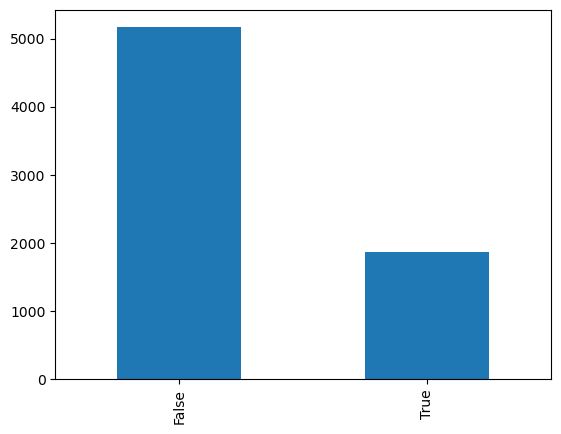

In [208]:
import matplotlib_inline
import matplotlib.pyplot as plt
count_classes = churnData['churned'].value_counts()
count_classes.plot(kind = 'bar')

In [209]:
from sklearn.utils import resample

In [210]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X.columns)

# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X.columns)

X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,0.434674,-0.43759,-0.518620,-0.087908
1,-1.195652,-0.43759,-0.374443,-0.921285
2,0.923772,-0.43759,0.432616,0.963781
3,0.516190,-0.43759,-0.333013,0.122920
4,0.923772,-0.43759,1.199902,1.401088


In [211]:
train= X_train_scaled.join([y_train])
train.columns

Index(['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'churned'], dtype='object')

In [212]:
no_churn = train.loc[train['churned']==0]
yes_churn = train.loc[train['churned']==1]
yes_churn.shape, no_churn.shape

((1189, 5), (3282, 5))

In [213]:
# oversample minority
yes_churn_oversampled = resample(yes_churn, #<- sample from here
                                replace=True, #<- we need replacement, since we don't have enough data otherwise
                                n_samples = len(no_churn),#<- make both sets the same size
                                random_state=0)

In [214]:
train_oversampled = pd.concat([no_churn, yes_churn_oversampled],axis=0)

Index(['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'churned'], dtype='object')

In [215]:
train_oversampled.dtypes

tenure            float64
SeniorCitizen     float64
MonthlyCharges    float64
TotalCharges      float64
churned            object
dtype: object

In [227]:
X_train_over= train_oversampled.drop(columns='churned')
y_train_over= train_oversampled['churned'].astype(bool)
y_train_over.reset_index(drop=True)

0       False
1       False
2       False
3       False
4       False
        ...  
6559     True
6560     True
6561     True
6562     True
6563     True
Name: churned, Length: 6564, dtype: bool

In [224]:
scaler = StandardScaler().fit(X_train_over)
X_train_scaled = scaler.transform(X_train_over)
X_train_scaled

array([[ 0.44737084, -0.43538654, -0.50709638, -0.07574377],
       [-1.1897943 , -0.43538654, -0.36296842, -0.91332251],
       [ 0.52922909, -0.43538654, -0.32155234,  0.13614701],
       ...,
       [ 0.40644171, -0.43538654, -0.80197888, -0.27549798],
       [ 0.07900868,  2.29680966,  0.15887421,  0.01251817],
       [ 1.63431556, -0.43538654,  1.31189792,  2.35631864]])

#apparently we have to scale again otherwise the function will not recognize the dataframe, as it's expecting an array. is this correct ? 

In [229]:
from sklearn.linear_model import LogisticRegression
Logreg2=LogisticRegression()
Logreg2.fit(X_train_scaled, y_train_over)

LogisticRegression()

In [231]:
y_pred_Logreg2_train = Logreg2.predict(X_train_scaled)
Logreg2_train_scores= [accuracy_score(y_train_over, y_pred_Logreg2_train), precision_score(y_train_over, y_pred_Logreg2_train), recall_score(y_train_over, y_pred_Logreg2_train), roc_auc_score(y_train_over, y_pred_Logreg2_train)]
cmLogreg2_train= confusion_matrix(y_train_over, y_pred_Logreg2_train).tolist()
cmLogreg2_train=[el for i in cmLogreg2_train for el in i]
print("Confusion matrix train :", cmLogreg2_train)

y_pred_Logreg2 = Logreg2.predict(X_test_scaled)
Logreg2_scores= [accuracy_score(y_test, y_pred_Logreg2), precision_score(y_test, y_pred_Logreg2), recall_score(y_test, y_pred_Logreg2), roc_auc_score(y_test, y_pred_Logreg2)]
cmLogreg2= confusion_matrix(y_test, y_pred_Logreg2).tolist()
cmLogreg2=[el for i in cmLogreg2 for el in i]
print("Confusion matrix test :", cmLogreg2)

scores_Logreg2= (pd.DataFrame(list(zip(Logreg2_train_scores + Logreg2_scores)),
               columns = ["LogisticRegression Balanced Data"], 
               index =['Accuracy_Train', 'Precision_train', 'Recall_Train', 'RocAuc_Train','Accuracy_Test', 'Precision_Test', 'Recall_Test', 'RocAuc_Test' ]))
scores_Logreg2

Confusion matrix train : [1155, 2127, 1152, 2130]
Confusion matrix test : [478, 555, 42, 332]


/Users/tatianadeferaudy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,LogisticRegression Balanced Data
Accuracy_Train,0.500457
Precision_train,0.500352
Recall_Train,0.648995
RocAuc_Train,0.500457
Accuracy_Test,0.575693
Precision_Test,0.374295
Recall_Test,0.887701
RocAuc_Test,0.675215


In [232]:
RFC2 = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=98)
RFC2.fit(X_train_scaled, y_train_over)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=98)

In [233]:
scores_RFC2 = cross_val_score(RFC2, X=X_train_scaled, y=y_train_over, cv=10)
print('Cross Validation accuracy scores for Random Forest: %s' % scores_RFC2)
print('Cross Validation accuracy for Random Forest: %.3f +/- %.3f' % (np.mean(scores_RFC2),np.std(scores_RFC2)))


Cross Validation accuracy scores for Random Forest: [0.82191781 0.85235921 0.84170472 0.847793   0.85213415 0.83384146
 0.86890244 0.84603659 0.8445122  0.85518293]
Cross Validation accuracy for Random Forest: 0.846 +/- 0.012


In [236]:
y_pred_RFC2_train = RFC2.predict(X_train_mms)
RFC2_train_scores= [accuracy_score(y_train, y_pred_RFC2_train), precision_score(y_train, y_pred_RFC2_train), recall_score(y_train, y_pred_RFC2_train), roc_auc_score(y_train, y_pred_RFC2_train)]
cmRFC2_train= confusion_matrix(y_train, y_pred_RFC2_train).tolist()
cmRFC2_train=[el for i in cmRFC2_train for el in i]
print("Confusion matrix train :", cmRFC2_train)

y_pred_RFC2 = RFC2.predict(X_test_mms)
RFC2_scores= [accuracy_score(y_test, y_pred_RFC2), precision_score(y_test, y_pred_RFC2), recall_score(y_test, y_pred_RFC2), roc_auc_score(y_test, y_pred_RFC2)]
cmRFC2= confusion_matrix(y_test, y_pred_RFC2).tolist()
cmRFC2=[el for i in cmRFC2 for el in i]
print("Confusion matrix test :", cmRFC2)

scores_RFC2= (pd.DataFrame(list(zip(RFC2_train_scores + RFC2_scores)),
               columns = ["RFC balanced"], 
               index =['Accuracy_Train', 'Precision_train', 'Recall_Train', 'RocAuc_Train','Accuracy_Test', 'Precision_Test', 'Recall_Test', 'RocAuc_Test' ]))
scores_RFC2

Confusion matrix train : [3435, 695, 1100, 395]
Confusion matrix test : [873, 160, 271, 103]


,RFC balanced
Accuracy_Train,0.680889
Precision_train,0.362385
Recall_Train,0.264214
RocAuc_Train,0.547967
Accuracy_Test,0.693674
Precision_Test,0.391635
Recall_Test,0.275401
RocAuc_Test,0.560256


In [238]:
results= results.join([round(scores_Logreg2,2), round(scores_RFC2,2)])

In [240]:
results.T

,Accuracy_Train,Precision_train,Recall_Train,RocAuc_Train,Accuracy_Test,Precision_Test,Recall_Test,RocAuc_Test
LogisticRegression,0.79,0.66,0.46,0.69,0.78,0.63,0.43,0.67
KNeighborsClassifier,0.83,0.72,0.61,0.76,0.76,0.57,0.45,0.66
DecisionTreeClassifier,0.99,0.99,0.97,0.98,0.73,0.49,0.50,0.65
Random Forest Classifier,0.99,0.98,0.98,0.99,0.76,0.56,0.43,0.66
LogisticRegression Balanced Data,0.50,0.50,0.65,0.50,0.58,0.37,0.89,0.68
RFC balanced,0.68,0.36,0.26,0.55,0.69,0.39,0.28,0.56


In [ ]:
# Not trying all the other balancing methods 
# However I don't see a huge improvement here... 
# The best score on the test dataset (ROCAUC) is achieved by the balanced regression, but it's not much higher than the normal regression. 
# Recall if also good for the balanced regression. 
# globally though, scores on test data are pretty bad... is this expected ?